# 화장품 추천 모델

### <목차>

- 1. EDA
- 2. 화장품 추천 모델 : Collaborative Filtering
- 3. 향후 계획

## 1. EDA

In [1]:
import scipy as sp
import pandas as pd
import numpy as np

import warnings  
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/cos.csv')

In [3]:
# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
# 그래프 문자 깨지는 것 대처
import matplotlib.font_manager as fm        
plt.rc('font', family='NanumGothic')
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False 

In [6]:
print(data.shape)
data.head()

(8829, 14)


,index,content,rating,age,gender,nickname,skin_type,brand_name,product_name,product_id,brand_id,editor/rank,editor/review_count,user_id
0,313,지금도 쓰고 있는 모찌모띠한 밀크 로션\r\n계속 쓸 예정ㅎㅎㅎ,5,22,2,쏭이누나,건성,하다라보,고쿠쥰 밀크,35073,636,9999999,20,1163758
1,3588,이니스프리꺼는 정말 피부에 좋은것 같아요,4,22,2,쏭이누나,건성,이니스프리,그린티 씨드 에센스인로션,103703,186,45440,20,1163758
2,3590,보고 쿠폰으로 사서 저렴하고 좋네영 히히,5,26,2,국화빵1,복합성,이니스프리,그린티 씨드 에센스인로션,103703,186,51549,12,1160122
3,3589,이니스프리 올리브 라인이 많이 무거워서 샀는데 괜찮은 것 같아요! 다만 심한 건성 ...,4,19,2,ria121,건성,이니스프리,그린티 씨드 에센스인로션,103703,186,45440,20,1159290
4,1577,흡수도 진짜 잘되고 보습력도 좋아요!!\r\n바르고 나서 가볍고 끈적이지 않는 느낌...,5,14,2,야채크래커,민감성,에뛰드하우스,순정 10 무 진정 수분 에멀전,89297,160,62397,8,1154272


### (1) 평점 분포

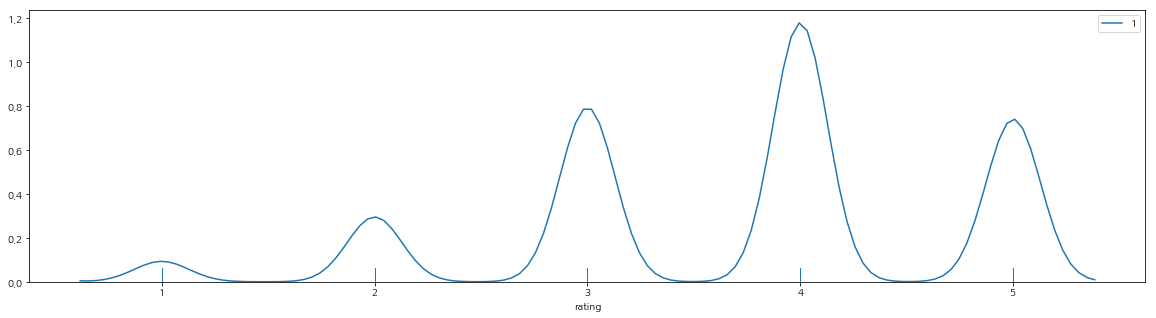

In [7]:
plt.subplots(figsize=(20,5))
sns.distplot(data.rating, hist=False, label='1', kde=True, rug=True)

### (2) 연령 분포

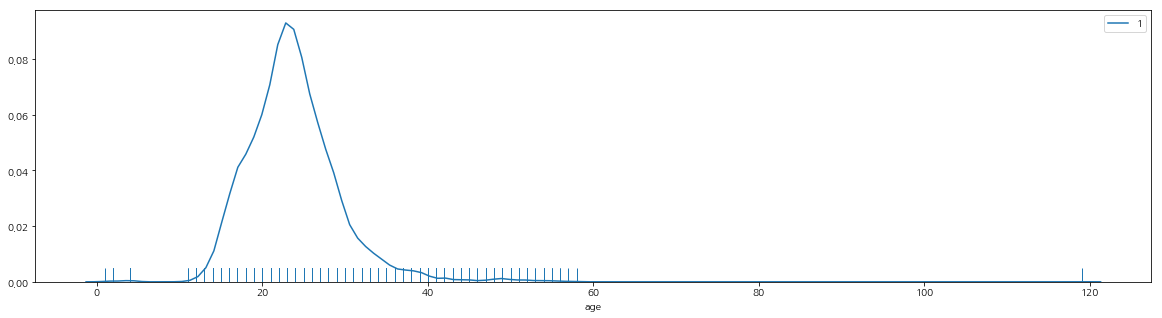

In [8]:
plt.subplots(figsize=(20,5))
sns.distplot(data.age, hist=False, label='1', kde=True, rug=True)

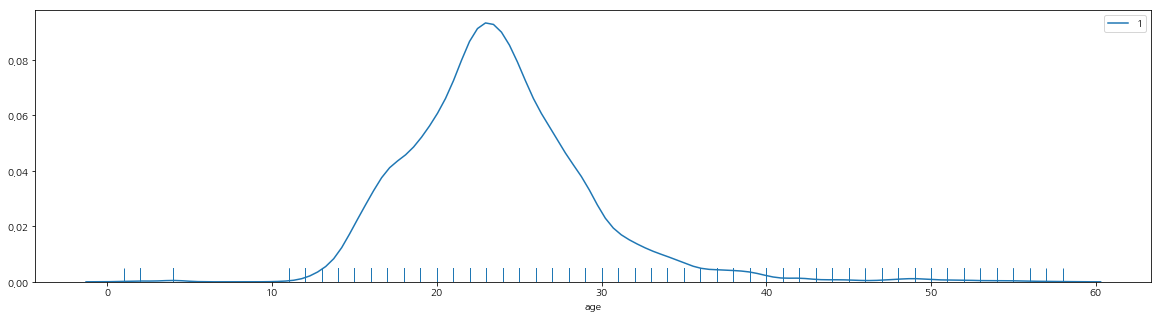

In [6]:
data = data[data['age']<60]
plt.subplots(figsize=(20,5))
sns.distplot(data.age, hist=False, label='1', kde=True, rug=True)

### (3) 성별 분포 (압도적으로 여성 다수)

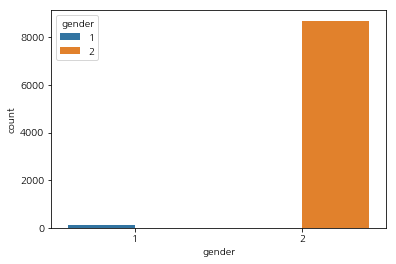

In [7]:
sns.countplot(data=data, x='gender', hue='gender')

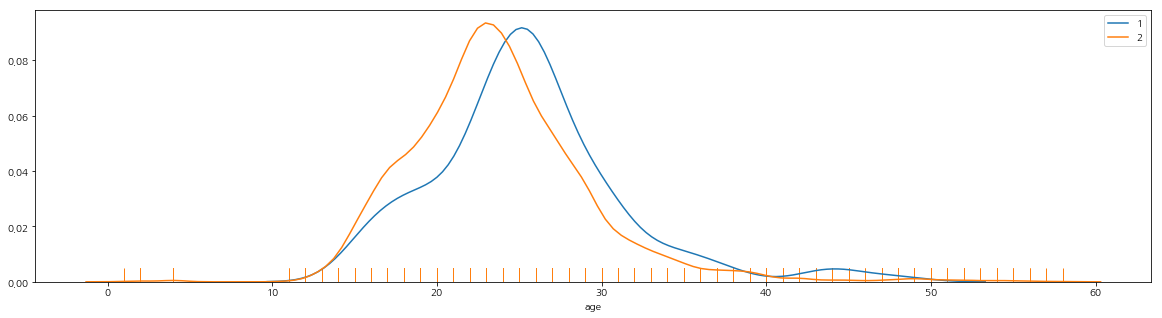

In [8]:
men = data[data['gender']==1]
women = data[data['gender']==2]

import seaborn as sns
plt.subplots(figsize=(20,5))
sns.distplot(men.age, hist=False, label='1', kde=True, rug=True)
sns.distplot(women.age, hist=False, label='2', kde=True, rug=True)

### => 여성은 20대 초반, 남성은 20대 중반

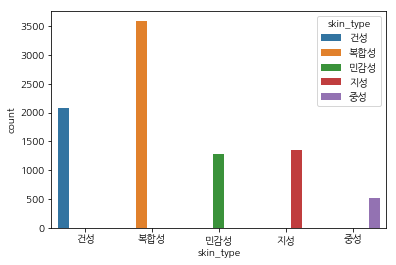

In [9]:
sns.countplot(data=data, x='skin_type', hue='skin_type')

In [10]:
data.skin_type.value_counts()

복합성    3592
건성     2078
지성     1359
민감성    1288
중성      511
Name: skin_type, dtype: int64

## 2. 현재까지 한 것

### (1) 화장품 데이터 크롤링 : 
- 글로우픽 사이트에서 소비자 프로파일 및 리뷰, 평점 데이터 크롤링
- 'content', 'rating', 'age', 'gender', 'nickname', 'skin_type', 'brand_name', 'product_name', 'product_id', 'brand_id', 'editor/rank',
  'editor/review_count', 'user_id'

### (2) 화장품 추천 모델
- Collaborative Filtering
- User-based : 평점 계산

In [11]:
data = pd.read_csv('data/cos_2more.csv')

In [12]:
print(data.shape)
data.head(2)

(2888, 15)


,index,content,rating,age,gender,nickname,skin_type,brand_name,product_name,product_id,brand_id,editor/rank,editor/review_count,user_id,2개이상
0,313,지금도 쓰고 있는 모찌모띠한 밀크 로션\r\n계속 쓸 예정ㅎㅎㅎ,5,22,2,쏭이누나,건성,하다라보,고쿠쥰 밀크,35073,636,9999999,20,1163758,쏭이누나
1,3588,이니스프리꺼는 정말 피부에 좋은것 같아요,4,22,2,쏭이누나,건성,이니스프리,그린티 씨드 에센스인로션,103703,186,45440,20,1163758,쏭이누나


In [20]:
df = data[['nickname', 'product_name', 'rating']]

In [21]:
print(df.shape)
df.head()

(8829, 3)


,nickname,product_name,rating
0,쏭이누나,고쿠쥰 밀크,5
1,쏭이누나,그린티 씨드 에센스인로션,4
2,국화빵1,그린티 씨드 에센스인로션,5
3,ria121,그린티 씨드 에센스인로션,4
4,야채크래커,순정 10 무 진정 수분 에멀전,5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 3 columns):
nickname        8829 non-null object
product_name    8829 non-null object
rating          8829 non-null int64
dtypes: int64(1), object(2)
memory usage: 207.0+ KB


In [28]:
df[df['nickname'] == '재윤이3']

,nickname,product_name,rating
4663,재윤이3,데일리리페어 모이스처라이저,3
4664,재윤이3,아쿠아볼릭 모이스처라이징 에멀전,3
4665,재윤이3,굳세라 수퍼 세라마이드 에멀젼,4
4666,재윤이3,클리낭스 엑스퍼트 에멀전,5
4667,재윤이3,모이스트젠 에멀젼 스킨 하이드레이션,3
4668,재윤이3,더테라피 에센셜 포뮬러 에멀젼,2
4669,재윤이3,에이리페어 오리지날 로션,2
4670,재윤이3,미라클 모이스처 에멀전,4
4671,재윤이3,인텐스 모이스처 바이탈라이징 에멀젼,4
4672,재윤이3,피토아쿠아 에멀젼,4


In [33]:
# 테이블을 딕셔너리로 만드는 함수
def recur_dictify(frame):
    if len(frame.columns) == 1:
        if frame.values.size == 1: return frame.values[0][0]
        return frame.values.squeeze()
    grouped = frame.groupby(frame.columns[0])
    d = {k: recur_dictify(g.ix[:,1:]) for k,g in grouped}
    return d

In [30]:
df_to_dict = recur_dictify(df)

In [31]:
user1 = df_to_dict['재윤이3']

In [32]:
df_to_dict

{' 임블리 ': {'아크바이™ 클린페이스로션': 2},
 '!!o-o': {'수분가득 콜라겐 에멀전': 4},
 '!YOLO!': {'인핸서 스킨 컨디셔닝 젤': 2},
 '!ㅇㅈㅇ!': {'수분가득 콜라겐 에멀전': 4},
 '!띠드버거!': {'닥터솔루션 아큐어 클래리파잉 에멀전': 4},
 '#Aubrey': {'오트 마일드 모이스처 올인원 로션 ': 4},
 '#soso': {'에센셜 모이스처라이저': 4},
 '#금갱': {'1025 독도 로션': 2},
 '#달덩이': {'웰빙 녹차 로션': 1},
 '#민주': {'순정 10 무 진정 수분 에멀전': 5},
 '#파스타': {'제주 탄산 미네랄 로션': 5},
 '#하성운': {'어린잎 퓨어 브로콜리 에멀전': 4},
 '%연보라': {'드라마티컬리 디퍼런트 모이스춰라이징 젤': 3},
 '(:3': {'아토로션': 4},
 '(신은서)': {'핑크 생기 워터 에멀전': 4},
 '+[hanel]+': {'그린티 밸런싱 로션': 5},
 '-핀-': {'더 촉촉 그린티 수분 로션': 5},
 ".'..": {'비자 트러블 로션': 2},
 '..,..': {'MLE 로션': 5},
 '....': {'1025 독도 로션': 3},
 '..7': {'더테라피 에센셜 포뮬러 에멀젼': 5, '수퍼 아쿠아 울트라 워터-풀 컨트롤 에멀젼': 5},
 '.하빈': {'아르간 20˚ 스팀 에멀젼': 5},
 '0001수진': {'오트 마일드 모이스처 올인원 로션 ': 3},
 '00HJ': {'애터미 밀크 로션': 5},
 '0126/정찬우': {'데일리리페어 모이스처라이저': 2, '어린쑥 수분진정 플루이드': 5},
 '02쨩': {'난 열 에센스 안부러워 탁월로션': 5},
 '030o3o': {'인핸서 스킨 컨디셔닝 젤': 5, '클래리파잉 모이스처라이저': 5},
 '0424S2': {'로열허니 에센셜 에멀전': 4, '유자 수분씨 에멀전': 4},
 '0_=': {'아르간 20˚ 스팀 에멀젼': 

In [34]:
name_list = []      # 사용자 목록을 담을 리스트   # 중복 불가
cos_set = set()     # 영화 목록을 담을 set        # 중복 가능

In [35]:
# 사용자 수 만큼 반복한다.
for user_key in df_to_dict:
#     print(user_key)
    name_list.append(user_key)
    
    # 현재 사용자가 본 화장품 목록을 set에 담는다.
    for cos_key in df_to_dict[user_key] :
        # print(user_key, ":", cos_key)
        cos_set.add(cos_key)        

In [36]:
cos_set      

{'1025 독도 로션',
 'AC 컨트롤 레서피 모이스춰 로션',
 'AC 클린업 젤로션',
 'AC클리닉 데일리 젤 로션',
 'AI 리페어 로션',
 'MLE 로션',
 '고쿠쥰 밀크',
 '굳세라 수퍼 세라마이드 에멀젼',
 '그린티 밸런싱 로션',
 '그린티 씨드 에센스인로션',
 '난 열 에센스 안부러워 탁월로션',
 '난코 티트리 에멀젼',
 '닥터솔루션 아큐어 클래리파잉 에멀전',
 '닥터트럽 마일드 로션',
 '더 심플 데일리 로션',
 '더 촉촉 그린티 수분 로션',
 '더테라피 에센셜 포뮬러 에멀젼',
 '데일리 모이스쳐 테라피 페이셜 로션',
 '데일리리페어 모이스처라이저',
 '데일리어드밴스 울트라 하이드레이팅 로션',
 '드라마티컬리 디퍼런트 모이스춰라이징 로션+',
 '드라마티컬리 디퍼런트 모이스춰라이징 젤',
 '똘러리앙 울트라',
 '똘러리앙 울트라 라이트',
 '로열허니 에센셜 에멀전',
 '로열허니 착한 에멀전',
 '망고씨드 실크 보습 로션',
 '망고씨드 실크보습 로션',
 '모이스처 세라마이드 에멀젼',
 '모이스춰라이징 로션',
 '모이스트 플로랄 스킨 로션',
 '모이스트젠 에멀젼 스킨 하이드레이션',
 '미라클 모이스처 에멀전',
 '밀키 모이스춰라이저 하이드라 밸런싱',
 '비자 트러블 로션',
 '서플 프레퍼레이션 올 오버 로션',
 '수분가득 콜라겐 로션',
 '수분가득 콜라겐 에멀전',
 '수분베리 에멀전',
 '수퍼 아쿠아 울트라 워터-풀 컨트롤 에멀젼',
 '순정 10 무 진정 수분 에멀전',
 '슈퍼바이탈 에멀젼 엑스트라 컨센트레이티드',
 '스네일 솔루션 에멀젼',
 '스밈 광채 보습 에멀젼',
 '스킨 앤 굳세라 울트라 에멀젼',
 '아르간 20˚ 스팀 에멀젼',
 '아르쌩뜨 에코-테라피 익스트림 모이스처 데일리 모이스처라이저',
 '아임리얼 티트리 피지 모공로션',
 '아쿠아볼릭 모이스처라이징 에멀전',
 '아쿠아수르스 논스탑 밀키 로션 (중복합성 타입)',
 '아크바이™ 클린페이스로션',
 '아토

In [37]:
cos_list = list(cos_set)

In [38]:
print(name_list)              # 사용자 리스트
print(cos_list)               # 화장품 리스트

[' 임블리 ', '!!o-o', '!YOLO!', '!ㅇㅈㅇ!', '!띠드버거!', '#Aubrey', '#soso', '#금갱', '#달덩이', '#민주', '#파스타', '#하성운', '%연보라', '(:3', '(신은서)', '+[hanel]+', '-핀-', ".'..", '..,..', '....', '..7', '.하빈', '0001수진', '00HJ', '0126/정찬우', '02쨩', '030o3o', '0424S2', '0_=', '0ghfmfckwd', '0yoon6', '0ㅂ0', '0ㅈㅁ0', '0꿍치0', '0뚜찌빠찌0', '0무다리0', '0즈우', '0찹쌀떡0', '0한별0', '1000%', '10000', '1000years', '1027_', '109212530', '10ㅇ01', '10글자다채웠다히힣', '10대여학생', '10월23일', '11.15', '1109', '11220', '123123', '1262', '12월12일', '14tokki', '150816', '1516', '16042', '1632j', '16학번lcy', '17-Jun', '17나야나', '17학번새내기', '19888', '19호', '1ㅅㅎ1', '1밍지1', '1영은', '1오소리1', '1욤욤2', '1월1일', '1월의이끼', '1청순코덕1', '1하리보1', '20811', '20km', '2141565', '21호', '221324', '222윤지', '22수연', '23__', '23호', '28년여드름', '292_292', '2yuri', '2뚱뚱2', '2레아', '2슈니', '2아리메', '2콩콩2', '3.141592', '321233', '3428yu', '381933', '3jin', '3대천왕', '3뿡뿡이3', '404', '44미녀', '460546', '465438', '4H', '4월2일', '530184', '53최정민', '5535', '5뚜ㄱi햇반', '6120612', '618', '6541pp', '

In [39]:
name_list.index('재윤이3')

5741

In [40]:
# 학습할 데이터를 준비한다.
rating_dic = {
    'nickname' : [],
    'product_name' : [],
    'rating' : []
    }

In [41]:
# 사용자의 수 만큼 반복
for name_key in df_to_dict :
    # 해당 사용자가 본 영화 수 만큼 반복
    for cos_key in df_to_dict[name_key] :

        # 사용자 인덱스 번호를 추출한다.
        a1 = name_list.index(name_key)

        # 화장품 인덱스 번호를 추출한다.
        a2 = cos_list.index(cos_key)

        # 평점을 가져온다.
        a3 = df_to_dict[name_key][cos_key]

        # 딕셔너리에 담는다.
        rating_dic['nickname'].append(a1)
        rating_dic['product_name'].append(a2)
        rating_dic['rating'].append(a3)

In [42]:
# 사용자 - 영화 - 평점
print(len(rating_dic['nickname']))
print(len(rating_dic['product_name']))
print(len(rating_dic['rating']))

8829
8829
8829


In [43]:
# 사용자 - 영화 - 평점
print(rating_dic['nickname'])
print(rating_dic['product_name'])
print(rating_dic['rating'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 20, 21, 22, 23, 24, 24, 25, 26, 26, 27, 27, 28, 29, 29, 30, 31, 31, 31, 32, 33, 34, 35, 35, 36, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 46, 47, 47, 47, 48, 49, 49, 50, 51, 52, 53, 54, 54, 55, 55, 56, 56, 57, 58, 59, 60, 61, 62, 63, 64, 64, 64, 64, 65, 66, 66, 67, 67, 67, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 76, 77, 78, 79, 80, 81, 82, 83, 83, 84, 85, 86, 87, 88, 89, 89, 90, 91, 91, 92, 92, 93, 94, 95, 96, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 113, 113, 114, 114, 114, 115, 116, 117, 118, 119, 120, 121, 122, 122, 123, 124, 124, 125, 126, 127, 128, 129, 130, 130, 131, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 159, 160, 161, 162, 163, 164, 165, 166, 166, 167, 168, 168, 169, 170, 170, 171, 172, 173, 173, 173, 174, 175, 175, 176, 177, 178, 179, 180, 180, 181

In [44]:
#  데이터셋을 만든다
df = pd.DataFrame(rating_dic)
df

,nickname,product_name,rating
0,0,6,2
1,1,22,4
2,2,3,2
3,3,22,4
4,4,52,4
5,5,95,4
6,6,64,4
7,7,54,2
8,8,48,1
9,9,70,5


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 3 columns):
nickname        2888 non-null int64
product_name    2888 non-null int64
rating          2888 non-null int64
dtypes: int64(3)
memory usage: 67.8 KB


In [45]:
import surprise
# 데이터를 읽어들이는 객체 생성 (rating_scale : 평점의 범위)
reader = surprise.Reader(rating_scale = (1, 5))
reader

In [46]:
# surprise 에서 사용할 데이터 셋을 구성할 때 필요한 이름
# 데이터가 저장되어 있는 딕셔너리의 컬럼 이름
# 첫번째 -> user,   두번째 -> item,   세번째 -> rating

col_list = ['nickname', 'product_name', 'rating']
data = surprise.Dataset.load_from_df(df[col_list], reader)

In [47]:
print(col_list)
print(data)

['nickname', 'product_name', 'rating']


In [48]:
# 학습한다.
trainset = data.build_full_trainset()
option = {'name' : 'pearson'}
algo = surprise.KNNBasic(sim_options=option)

algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [101]:
name_list

['..7',
 '0126/정찬우',
 '030o3o',
 '0424S2',
 '0ghfmfckwd',
 '0ㅂ0',
 '0무다리0',
 '0즈우',
 '10대여학생',
 '10월23일',
 '1109',
 '14tokki',
 '150816',
 '1516',
 '19호',
 '1밍지1',
 '1영은',
 '2141565',
 '28년여드름',
 '2아리메',
 '3.141592',
 '321233',
 '3대천왕',
 '7',
 '7.7',
 '92',
 '9210ds',
 '9999꾸',
 '9ohkkk',
 'Amarili',
 'BTOB예지앞사',
 'CL0220',
 'Carolline',
 'Ceria',
 'Chel2',
 'Coys',
 'Darlene',
 'Eagtg',
 'G1CLOVER',
 'HahaHaa',
 'Happyyy',
 'Helen헬렌',
 'ILTL',
 'JOYfull',
 'JYJ724',
 'JazzTango',
 'Jenniel',
 'J에이드',
 'Kahoni',
 'Kayla_',
 'LXX',
 'Lanaa',
 'Lucie2',
 'LunaMin',
 'Nevermind',
 'Oapeg',
 'Oh5',
 'RJ01',
 'Rosalie',
 'SOSO연',
 'S_jw18',
 'Sally021',
 'Sense',
 'SsooS',
 'TWO',
 'TWO1',
 'Vlove',
 'Wendy97',
 'YL21',
 'YONYP',
 'Y제이드',
 '__02__',
 'aAY0',
 'a_agnes',
 'aa332467',
 'alice0129',
 'amy614',
 'amycho517',
 'ansth',
 'aree',
 'ari아리',
 'asj7428',
 'asq4652',
 'avenue',
 'awstf',
 'ay1103',
 'baeviewda',
 'bigtre',
 'boomboomboom',
 'boston누누',
 'brendayoon',
 'byapple',
 'bye

In [49]:
# 사용자의 화장품을 추천받는다.
who = input('닉네임을 입력해주세요: ')
print('\n')

index = name_list.index(who)
print('user_index: ',index)
print('\n')

result = algo.get_neighbors(index, k=5)
print('당신의 피부와 유사한 사용자는? : ', result)
print('\n')

# user 귯니스에 대해 화장품을 추천한다.
print('당신에게 추천드리는 화장품 : ', '\n')

for r1 in result :
    max_rating=data.df[data.df["nickname"]==r1]["rating"].max()
    cos_id=data.df[(data.df["rating"]==max_rating)&(data.df["nickname"]==r1)]["product_name"].values
    
    for cos_item in cos_id:
        print(cos_list[cos_item])

닉네임을 입력해주세요: 재윤이3


user_index:  5741


당신의 피부와 유사한 사용자는? :  [836, 1445, 4729, 0, 1]


당신에게 추천드리는 화장품 :  

인텐스 모이스처 바이탈라이징 에멀젼
미라클 모이스처 에멀전
굳세라 수퍼 세라마이드 에멀젼
순정 10 무 진정 수분 에멀전
아크바이™ 클린페이스로션
수분가득 콜라겐 에멀전


In [26]:
# 사용자의 화장품을 추천받는다.
who = input('닉네임을 입력해주세요: ')
print('\n')

index = name_list.index(who)
print('user_index: ',index)
print('\n')

result = algo.get_neighbors(index, k=5)
print('당신의 피부와 유사한 사용자는? : ', result)
print('\n')

# user 귯니스에 대해 화장품을 추천한다.
print('당신에게 추천드리는 화장품!!')
for r1 in result :
    max_rating=data.df[data.df["nickname"]==r1]["rating"].max()
    cos_id=data.df[(data.df["rating"]==max_rating)&(data.df["nickname"]==r1)]["product_name"].values
    
    for cos_item in cos_id:
        print(cos_list[cos_item])

닉네임을 입력해주세요: 재윤이3




ValueError: '재윤이3' is not in list

In [85]:
# user 쭈크러시에 대해 화장품을 추천한다.
for r1 in result :
    max_rating=data.df[data.df["nickname"]==r1]["rating"].max()
    cos_id=data.df[(data.df["rating"]==max_rating)&(data.df["nickname"]==r1)]["product_name"].values
    
    for cos_item in cos_id:
        print(cos_list[cos_item])

드라마티컬리 디퍼런트 모이스춰라이징 젤
고쿠쥰 밀크
그린티 씨드 에센스인로션
밀키 모이스춰라이저 하이드라 밸런싱
더테라피 에센셜 포뮬러 에멀젼
수퍼 아쿠아 울트라 워터-풀 컨트롤 에멀젼
어린쑥 수분진정 플루이드
인핸서 스킨 컨디셔닝 젤
클래리파잉 모이스처라이저


In [121]:
# 사용자의 화장품을 추천받는다.
who = input('닉네임을 입력해주세요: ')

index = name_list.index(who)
print(index)

result = algo.get_neighbors(index, k=5)
print(result)

닉네임을 입력해주세요: 히토리마
1211
[0, 1, 2, 3, 4]


In [ ]:
# 사용자의 화장품을 추천받는다.
who = input('닉네임을 입력해주세요: ')

index = name_list.index(who)
print(index)

result = algo.get_neighbors(index, k=5)
print(result)

## 3. 향후 계획

(1) AWS에 서버 생성

(2) 챗봇 시스템(텔레그램 API 활용)
